# Pymaceuticals Inc.
---

### Analysis

- Though we can see a two of the 4 treaments showing a reduced tumor volume, the lack of granularity in weight measurements makes it very hard to use it as a guage and barely gives information. The correlation we find is that heavier rats tend to have bigger tumors.
Lastly, age isnt considered in the factors of the analysis.


 

In [542]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge( study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [543]:
# Checking the number of mice.
print("Number of Mice tested:")
mouse_data["Mouse ID"].nunique()

Number of Mice tested:


249

In [544]:


# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_data_complete=mouse_data.drop_duplicates(subset=['Mouse ID',"Timepoint"])



# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_filter= mouse_data[mouse_data.duplicated(["Mouse ID", "Timepoint"], keep= False)]
impostor = mouse_data_filter["Mouse ID"].unique().tolist()
impostor





['g989']

In [545]:
# Optional: Get all the data for the duplicate mouse ID. 
imposter_df = mouse_data[mouse_data["Mouse ID"].isin(impostor)]
imposter_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [546]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_byid =mouse_data.drop_duplicates(subset=['Mouse ID'])
mouse_data_byid

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [547]:
# Checking the number of mice in the clean DataFrame.
mouse_data_complete['Mouse ID'].nunique()


249

## Summary Statistics

In [548]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#data_by_regimen=mouse_data_complete.groupby(['Drug Regimen']).describe()

#data_by_regimen.head(10)

data_by_regimen_tumor=mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std','sem'])
data_by_regimen_tumor=data_by_regimen_tumor.rename(columns={'mean':'Mean Tumor Volume', 'median':'Median Tumor Volume', 'var':'Tumor VolumeVariance', 'std':'Tumor Volume Std. Dev', 'sem': 'Tumor Volume Std. Err.'})

data_by_regimen_tumor


,Mean Tumor Volume,Median Tumor Volume,Tumor VolumeVariance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [549]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

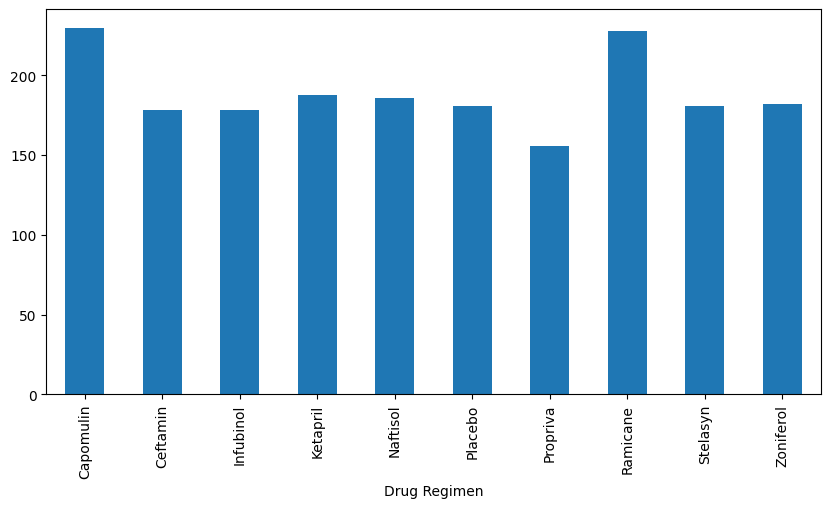

In [550]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = mouse_data_complete.groupby('Drug Regimen').count()['Mouse ID']

# Create a bar plot using the drug_regimen_counts series
drug_regimen_counts.plot(kind='bar', figsize=(10,5))

<BarContainer object of 1888 artists>

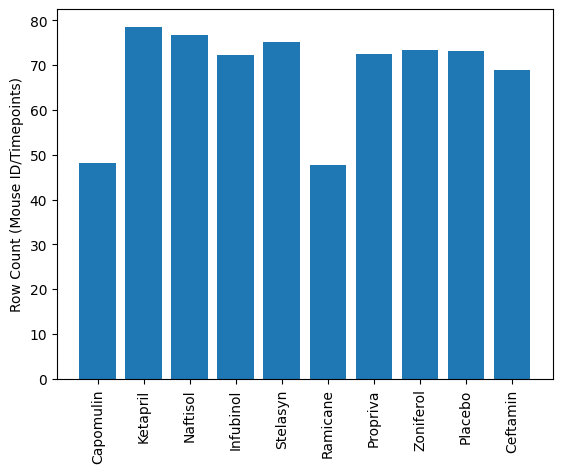

In [551]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.xticks(rotation = 90)
plt.ylabel("Row Count (Mouse ID/Timepoints)")
plt.bar(mouse_data_complete['Drug Regimen'], mouse_data_complete['Tumor Volume (mm3)'], align="center")

<Axes: ylabel='Sex'>

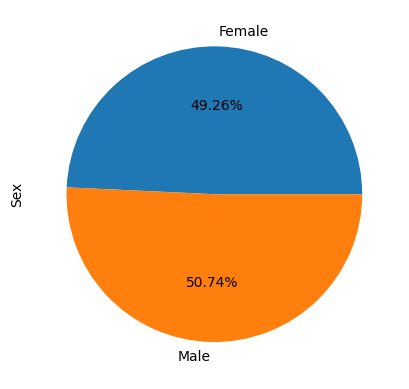

In [552]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = mouse_data_complete.groupby('Sex')['Sex'].count()
counts.plot(kind='pie',autopct='%1.2f%%')


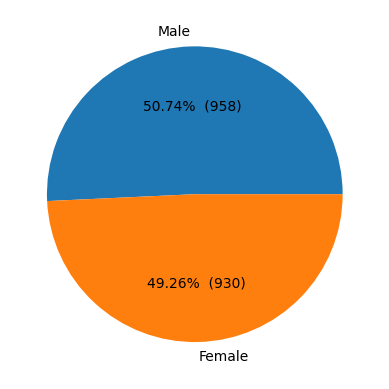

In [553]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


#this block of code is not mine but taken from stackoverflow.
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
# https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct




mouse_sex_data=[]
mouse_sex_data=mouse_data_complete['Sex'].value_counts().reset_index().rename(columns={0:"Sex",1:"Count"})
mouse_sex_data

mouse_sex_data_count=mouse_sex_data.count
mouse_sex_data_count



plt.pie(mouse_sex_data["Sex"],labels=["Male","Female"],autopct=make_autopct(mouse_sex_data["Sex"]))
plt.show()

## Quartiles, Outliers and Boxplots

In [554]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#mouse_data_complete

# Start by getting the last (greatest) timepoint for each mouse
drug_timepoint=mouse_data_complete[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
drug_timepoint=drug_timepoint.sort_values('Timepoint', ascending=False) 
drug_timepoint=drug_timepoint.drop_duplicates(['Mouse ID']) #keeps first value seen, if ordered then the first value seen in the largest




# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_timepoint_filter=drug_timepoint.loc[drug_timepoint['Drug Regimen'].isin(drugs)]
drug_timepoint_filter=drug_timepoint_filter.sort_values('Drug Regimen')
drug_timepoint_filter=drug_timepoint_filter.rename(columns={'Timepoint':'Last Timepoint',"Tumor Volume (mm3)":"Last Measure volume"})
#drug_timepoint_filter

mouse_data_complete=pd.merge(mouse_data_complete,drug_timepoint_filter,how='left',on=["Mouse ID", "Mouse ID"])
mouse_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_x,Sex,Age_months,Weight (g),Drug Regimen_y,Last Timepoint,Last Measure volume
0,b128,0,45.000000,0,Capomulin,Female,9,22,Capomulin,45.0,38.982878
1,f932,0,45.000000,0,Ketapril,Male,15,29,NaN,NaN,NaN
2,g107,0,45.000000,0,Ketapril,Female,2,29,NaN,NaN,NaN
3,a457,0,45.000000,0,Ketapril,Female,11,30,NaN,NaN,NaN
4,c819,0,45.000000,0,Ketapril,Male,21,25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1883,r944,45,41.581521,2,Capomulin,Male,12,25,Capomulin,45.0,41.581521
1884,u364,45,31.023923,3,Capomulin,Male,18,17,Capomulin,45.0,31.023923
1885,p438,45,61.433892,1,Ceftamin,Female,11,26,Ceftamin,45.0,61.433892
1886,x773,45,58.634971,4,Placebo,Female,21,30,NaN,NaN,NaN


In [555]:
# Put treatments into a list for for loop (and later for plot labels)
#lists to hold tumor sizes
Capomulin=[]
Ramicane=[]
Infubinol=[]
Ceftamin=[]
#drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_timepoint_filter.reindex


# Create empty list to fill with tumor vol data (for plotting)
for x in range(len(drug_timepoint_filter.index)):
    
    if drug_timepoint_filter.iloc[x,1]=="Capomulin" :
        Capomulin.append(drug_timepoint_filter.iloc[x,3])
    elif drug_timepoint_filter.iloc[x,1]=="Ramicane":
        Ramicane.append(drug_timepoint_filter.iloc[x,3])
    elif drug_timepoint_filter.iloc[x,1]=="Infubinol":
        Infubinol.append(drug_timepoint_filter.iloc[x,3])
    elif drug_timepoint_filter.iloc[x,1]=="Ceftamin":
        Ceftamin.append(drug_timepoint_filter.iloc[x,3])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

Capomulin_q3,Capomulin_q1=np.percentile(Capomulin, [75 ,25])
Capomulin_IQR=Capomulin_q3-Capomulin_q1
print(f"Capomulin IQR is: {Capomulin_IQR}")

Ramicane_q3,Ramicane_q1=np.percentile(Ramicane, [75 ,25])
Ramicane_IQR=Ramicane_q3-Ramicane_q1
print(f"Ramicane IQR is: {Ramicane_IQR}")

Infubinol_q3,Infubinol_q1=np.percentile(Infubinol, [75 ,25])
Infubinol_IQR=Infubinol_q3-Infubinol_q1
print(f"Infubinol IQR is: {Infubinol_IQR}")

Ceftamin_q3,Ceftamin_q1=np.percentile(Ceftamin, [75 ,25])
Ceftamin_IQR=Ceftamin_q3-Ceftamin_q1
print(f"Ceftamin IQR is: {Ceftamin_IQR}")

    
# Determine outliers using upper and lower
for x in range(len(Capomulin)):
    if Capomulin[x]>=(Capomulin_IQR*1.5+Capomulin_q3):
        print(f"There is an outlier in Capomulin:{Capomulin[x]}" )
    elif Capomulin[x]<=(Capomulin_q1-Capomulin_IQR*1.5):
        print(f"There is an outlier in Capomulin:{Capomulin[x]}" )

for x in range(len(Ramicane)):
    if Ramicane[x]>=(Ramicane_IQR*1.5+Ramicane_q3):
        print(f"There is an outlier in Ramicane:{Ramicane[x]}" )
    elif Ramicane[x]<=(Ramicane_q1-Ramicane_IQR*1.5):
        print(f"There is an outlier in Ramicane:{Ramicane[x]}" )

for x in range(len(Infubinol)):
    if Infubinol[x]>=(Infubinol_IQR*1.5+Infubinol_q3):
        print(f"There is an outlier in Infubinol:{Infubinol[x]}" )
    elif Infubinol[x]<=(Infubinol_q1-Infubinol_IQR*1.5):
        print(f"There is an outlier in Infubinol:{Infubinol[x]}" )

for x in range(len(Ceftamin)):
    if Ceftamin[x]>=(Ceftamin_IQR*1.5+Ceftamin_q3):
        print(f"There is an upper limit outlier in Ceftamin:{Ceftamin[x]}" )
    elif Ceftamin[x]<=(Ceftamin_q1-Ceftamin_IQR*1.5):
        print(f"There is a lower limit outlier in Ceftamin:{Ceftamin[x]}" )


Capomulin IQR is: 7.781863460000004
Ramicane IQR is: 9.098536719999998
Infubinol IQR is: 11.477135160000003
Ceftamin IQR is: 15.577752179999997
There is an outlier in Infubinol:36.3213458


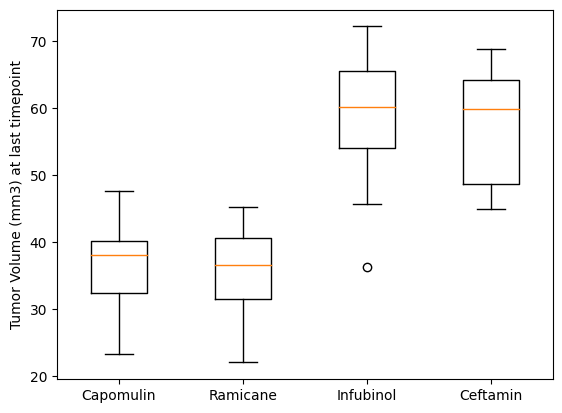

In [556]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([Capomulin,Ramicane,Infubinol,Ceftamin],labels=drugs)
plt.ylabel("Tumor Volume (mm3) at last timepoint")
plt.show()

## Line and Scatter Plots

In [557]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_x,Sex,Age_months,Weight (g),Drug Regimen_y,Last Timepoint,Last Measure volume
0,b128,0,45.000000,0,Capomulin,Female,9,22,Capomulin,45.0,38.982878
1,f932,0,45.000000,0,Ketapril,Male,15,29,NaN,NaN,NaN
2,g107,0,45.000000,0,Ketapril,Female,2,29,NaN,NaN,NaN
3,a457,0,45.000000,0,Ketapril,Female,11,30,NaN,NaN,NaN
4,c819,0,45.000000,0,Ketapril,Male,21,25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1883,r944,45,41.581521,2,Capomulin,Male,12,25,Capomulin,45.0,41.581521
1884,u364,45,31.023923,3,Capomulin,Male,18,17,Capomulin,45.0,31.023923
1885,p438,45,61.433892,1,Ceftamin,Female,11,26,Ceftamin,45.0,61.433892
1886,x773,45,58.634971,4,Placebo,Female,21,30,NaN,NaN,NaN


In [558]:
mouse_weight_id=mouse_data_complete.loc[mouse_data_complete['Mouse ID']=="b128"]
mouse_weight_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_x,Sex,Age_months,Weight (g),Drug Regimen_y,Last Timepoint,Last Measure volume
0,b128,0,45.000000,0,Capomulin,Female,9,22,Capomulin,45.0,38.982878
470,b128,5,45.651331,0,Capomulin,Female,9,22,Capomulin,45.0,38.982878
677,b128,10,43.270852,0,Capomulin,Female,9,22,Capomulin,45.0,38.982878
716,b128,15,43.784893,0,Capomulin,Female,9,22,Capomulin,45.0,38.982878
929,b128,20,42.731552,0,Capomulin,Female,9,22,Capomulin,45.0,38.982878
1263,b128,25,43.262145,1,Capomulin,Female,9,22,Capomulin,45.0,38.982878
1395,b128,30,40.605335,1,Capomulin,Female,9,22,Capomulin,45.0,38.982878
1542,b128,35,37.967644,1,Capomulin,Female,9,22,Capomulin,45.0,38.982878
1624,b128,40,38.379726,2,Capomulin,Female,9,22,Capomulin,45.0,38.982878
1759,b128,45,38.982878,2,Capomulin,Female,9,22,Capomulin,45.0,38.982878


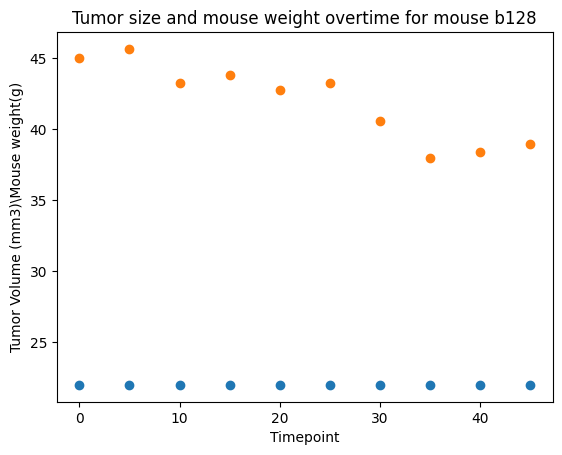

In [559]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


#mouse_weight_id
plt.scatter(mouse_weight_id['Timepoint'],mouse_weight_id['Weight (g)'])
plt.scatter(mouse_weight_id['Timepoint'],mouse_weight_id['Tumor Volume (mm3)'])
plt.title("Tumor size and mouse weight overtime for mouse b128")
plt.xlabel("Timepoint")
plt.ylabel('Tumor Volume (mm3)\Mouse weight(g)')
plt.show()

## Correlation and Regression

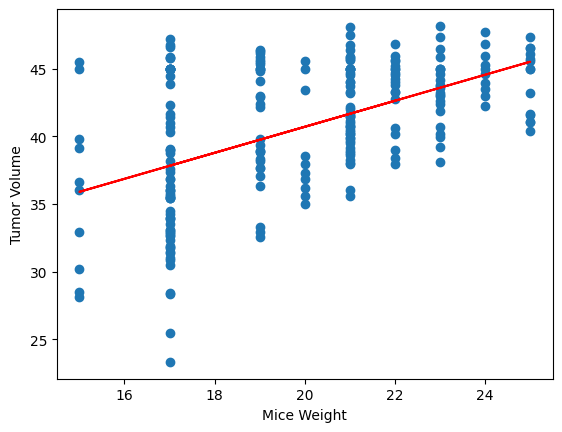

In [563]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress
mouse_weight_Capolin=mouse_data_complete.loc[mouse_data_complete['Drug Regimen_x']=="Capomulin"]


x_values = mouse_weight_Capolin['Weight (g)']
y_values = mouse_weight_Capolin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=5,color="red")
plt.xlabel('Mice Weight')
plt.ylabel('Tumor Volume')
plt.show()


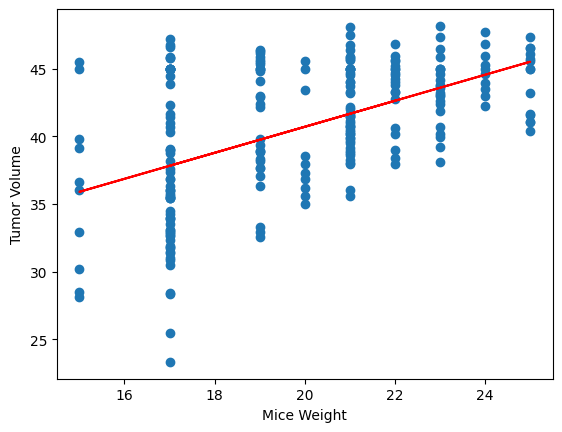

The r-squared is: 0.2763600223455914


In [562]:
x_values = mouse_weight_Capolin['Weight (g)']
y_values = mouse_weight_Capolin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=10,color="red")
plt.xlabel('Mice Weight')
plt.ylabel('Tumor Volume')

plt.show()
print(f"The r-squared is: {rvalue**2}")